## HW6_Part2: Reinforcement Learning

<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف هدف انجام دو بازی cartpole و pong با استفاده از یادگیری تقویتی است.
یادگیری تقویتی گونه‌ای از روش‌های یادگیری ماشین است که یک عامل
(Agent)
را قادر به یادگیری در محیطی تعاملی با استفاده از آزمون و خطاها و استفاده از بازخوردهای اعمال و تجربیات خود می‌سازد.
اگرچه هم یادگیری نظارت شده و هم یادگیری تقویتی از نگاشت بین ورودی و خروجی استفاده می‌کنند٫ اما در یادگیری تقویتی که در آن بازخوردهای فراهم شده برای عامل٫ مجموعه صحیحی از اعمال٫ جهت انجام دادن یک وظیفه هستند٫ برخلاف یادگیری نظارت شده از پاداش‌ها و تنبیه‌ها به عنوان سیگنال‌هایی برای رفتار مثبت و منفی بهره برده می‌شود.

یادگیری تقویتی در مقایسه با یادگیری نظارت نشده دارای اهداف متفاوتی است.
در حالی که در یادگیری نظارت نشده پیدا کردن مشابهت‌ها و تفاوت‌های بین نقاط داده محسوب می‌شود٫ در یادگیری تقویتی هدف پیدا کردن مدل داده مناسبی است که پاداش کل را برای عامل ماکزیمم می‌کند. تصویر زیر ایده‌ی اساسی و عناصر درگیر در یک مدل یادگیری تقویتی را نشان می‌دهد.

در این تکلیف هدف طراحی الگوریتم یادگیری تقویت شده با دو محیط متفاوت که به صورت زیر معرفی می‌شوند است:.

۱-محیط اول شامل بالانس کردن یک آونگ وارونه 
 با حرکت آن به سمت چپ و راست می‌باشد
 (Cartpole).

 ۲-محیط دوم شامل رقابت با یک رقیب دیگر در بازی 
 [pong](https://en.wikipedia.org/wiki/Pong)
 می‌باشد که رقیب می‌تواند انسان و یا AI
 باشد.

<div dir='rtl'style="text-align: right;font-family:verdana;">

برخی از اصطلاحاتی که عناصر یک مساله یادگیری تقویتی را تشریح می‌کنند در ادامه بیان شده است.

محیط (Environment): مکان فیزیکی که عامل در آن عمل می‌کند.

حالت (State): موقعیت کنونی عامل

پاداش (Reward): بازخورد از محیط

ارزش (Value): پاداش آینده که یک عامل با اقدام به یک عمل در یک حالت خاص به آن دست می‌یابد.

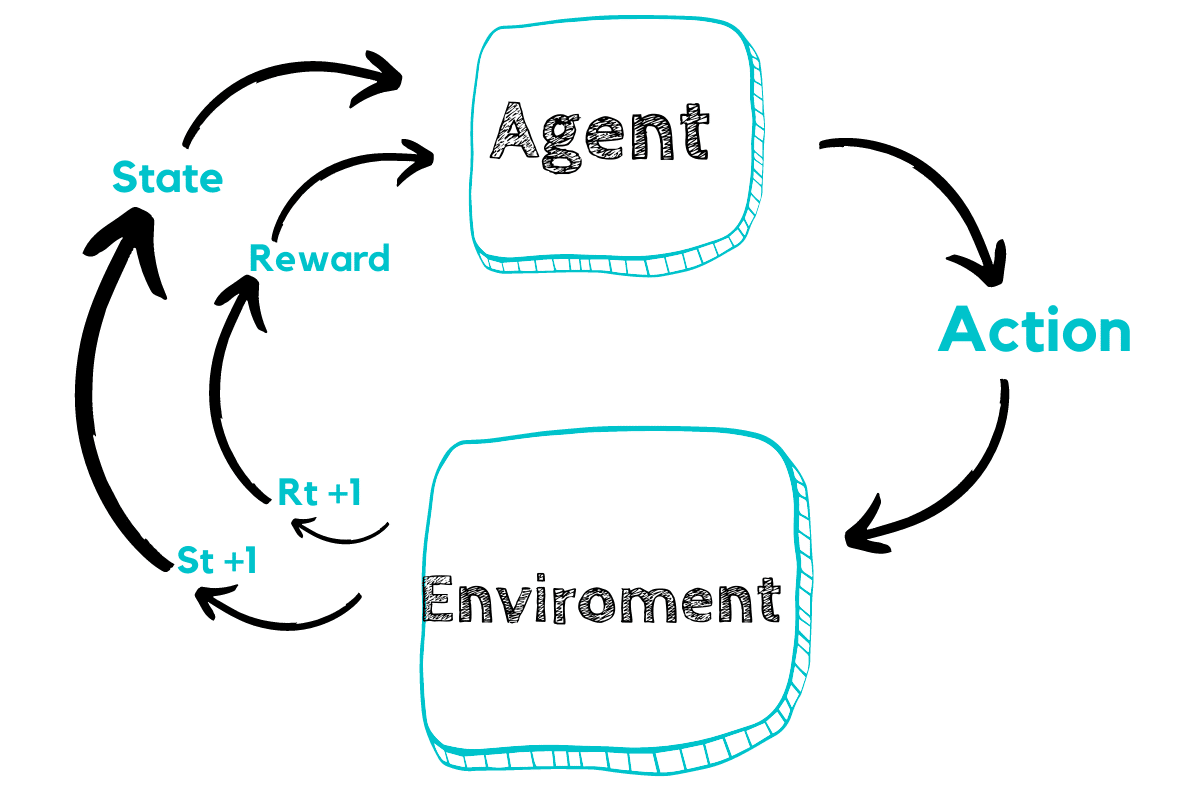

<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف از پکیج deeplearningcourse
که در اختیار شما قرار داده شده است٫ استفاده شده است. در مورد استفاده از پکیج مورد نظر به موارد زیر توجه کنید.


*   پکیج deeplearningcourse را در فولدر اصلی google drive خود ذخیره کنید.
*   کد داده شده را از ابتدا اجرا کنید تا به error برخورید.
* از قسمت Runtime/Restart runtime را اجرا کنید.
* دوباره از ابتدا شروع به اجرا برنامه کنید. حال پکیج مورد نظر شناخته شده است و می‌توانید از آن استفاده کنید.
* در صورت استفاده از google colab برای اجرای سریع‌تر برنامه می‌توانید در قسمت 
Runtime/change runtime type
حالت GPU را انتخاب کنید.

In [1]:
#Install some dependencies for visualizing the agents
!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!pip install gym pyvirtualdisplay scikit-video > /dev/null 2>&1

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import time
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

!pip install -e /content/drive/MyDrive/University/Deep\ Learning/HW6/deeplearningcourse
import deeplearningcourse as dlc


Obtaining file:///content/drive/MyDrive/University/Deep%20Learning/HW6/deeplearningcourse
  Attempting uninstall: deeplearningcourse
    Found existing installation: deeplearningcourse 0.0.0
    Can't uninstall 'deeplearningcourse'. No files were found to uninstall.
  Running setup.py develop for deeplearningcourse


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Part 1: Cartpole

## 3.1 Cartpole environment


<div dir='rtl'style="text-align: right;font-family:verdana;">

در هر دو محیط
Caarpole
و
Pong
ما از توسعه‌دهنده‌ی toolkit
که 
[OpenAI Gym](https://https://gym.openai.com/)
است استفاده می‌کنیم که در آن چندین محیط از قبل تعریف شده برای آموزش و تست استفاده می‌شود.

In [5]:
#Cartpole environment
import base64
import io
import gym
environment = gym.make("CartPole-v0")

import os

save_path = "/content/drive/MyDrive/University/Deep Learning/HW6/Model_Checkpoint"
start_time = f"{time.ctime(time.time())}"



<div dir='rtl'style="text-align: right;font-family:verdana;">

 کنترل آونگ وارونه
 (Cartpole)
  یکی از مسائل کلاسیک و مورد توجه در کنترل سیستم ها است که تاکنون روش های مختلفی برای کنترل آن پیشنهاد شده است . آونگ وارونه مسأله ای کلاسیک است و به طور گسترده به عنوان معیاری برای تست الگوریتم های کنترل به کار می رود. مشکل اصلی، کنترل آنلاین این سیستم تحت شرایط متغیر محیطی و امکان تطبیق پذیری هر چه بهتر این سیستم با محیط است.

سیستم پاندول معکوس از یک آونگ متصل به یک ارابه (Cart) تشکیل شده است، به طوری که ارابه با نیروی اعمال شونده به سمت چپ و راست حرکت می کند. هدف قراردادن آونگ در وضعیت قائم رو به بالا و حفظ آن در همان موقعیت می باشد، ضمن اینکه ارابه نیز باید حتی الامکان در مرکز خط ریل قرار گیرد و به گوشه ها برخورد نکند.

اگر زاویه آونگ از یک حدی تجاوز کرده یا ارابه از محدوده تعریف شده خارج شود (به اطراف برخورد کند). دراین صورت ارابه به صورت عمودی در می آید. به تعادل رساندن ارابه می تواند اپیزودیک (مرحله به مرحله) باشد و این اپیزودها تکرار می شوند تا پارامترهای مرتبط با actionبه درستی تعیین شده و ارابه به تعادل برسد.

پاداش در هر مرحله می تواند عدد +۱ به ازای هر مرحله ( )step تعیین شود تا زمانی که شکست اتفاق نیفتد. درنتیجه جمع پاداش در حقیقت تعداد مرحله ها (stepها) تا رخداد شکست تعریف می شود. به منظور توسعه یادگیری تقویتی می توان بعدها به صورت مداوم ( )continuing taskاز روش discountingنیز استفاده کرد. در این روش هربار رخداد شکست معادل با –۱ و سایر حالات معادل ۰ می باشد. در این حالت پارامتر return به صورت تعریف می شود که در آن K تعداد مرحله ها قبل از رخداد شکست می باشد. در هر دو روش به جهت عمود نگه داشته شدن آونگ برای بیشترین مدت زمان ممکن، مقدار پارامتر return بیشینه می شود.

در ابتدا ما فضای مشاهده را در نظر می‌گیریم. در این 
Cartpole
مشاهدات ما به صورت زیر هستند:


1.    مکان cart
2.    سرعت cart
3.  زاویه‌ی آونگ
4. نرخ چرخش آونگ

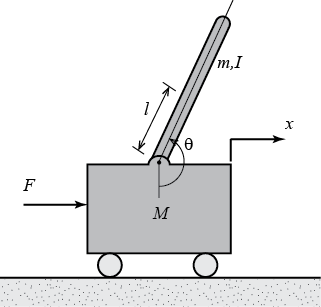

In [6]:
import IPython
import functools

In [7]:
environment.seed(1)
n_observ = environment.observation_space
print("observation space =", n_observ)

observation space = Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [8]:
n_act = environment.action_space.n
print("No. of possible actions =", n_act)

No. of possible actions = 2


###  Cartpole Agent



<div dir='rtl'style="text-align: right;font-family:verdana;">

حال ما محیط و ابعاد محیط را می‌دانیم و در این قسمت به طراحی عامل (Agent) پرداخته می‌شود.
 وظیفه‌ی Agent مشاهدات محیط را به عنوان ورودی دریافت می‌کند و خروجی احتمالات انجام هر کدام از وظایف است. در این قسمت به دلیل آن که محیط مشاهده دارای ابعاد کم می‌باشد طراحی یک شبکه‌ی ساده‌ی feed forward برای agent کفایت می‌کند. طراحی شبکه‌ی خود را به وسیله‌ی squential انجام دهید.

 همانطور که در ابتدا بیان شد agent با توجه به احتمالات خروجی حرکت بعدی را انتخاب می‌کند. شما موظف به طراحی تابع انتخاب حرکت بعدی توسط agent نیز هستید. تابع طراحی شده را در قسمت دوم برای pong هم می‌توانید استفاده کنید.

In [9]:
#Cartpole agent

def model_cartpole():
  model = tf.keras.models.Sequential([
                                      
      #TODO
      tf.keras.layers.Dense(64,activation='relu',name='Hidden1'),
      tf.keras.layers.Dense(16,activation='relu',name='Hidden2'),
      tf.keras.layers.Dense(2,activation=None,name='Output')


  ])
  return model

cartpole_model = model_cartpole()

In [10]:
# action function

def act_function(model, x_obser, single=True):
  x_observ = np.expand_dims(x_obser, axis=0) if single else x_obser


  logits = model.predict(x_observ)
  
  action = tf.random.categorical(logits, num_samples=1)




  action = action.numpy().flatten()

  return action[0] if single else action

## 3.2 Agent's memory


<div dir='rtl'style="text-align: right;font-family:verdana;">

با توجه به آنکه agent باید مشاهدات و حرکت‌هایش را به یاد بیاورد٫ شما در ادامه به طراحی حافظه‌ی agent می‌پردازید تا حرکت‌های درست را پاداش دهد و حرکت‌های نادرست را تنبیه کند.

In [11]:
# Agent Memory 

class Memory:
  def __init__(self): 
      self.clear()

  def clear(self): 
      self.observs = []
      self.actions = []
      self.rewards = []

  def add_memory(self, new_observ, new_act, new_reward): 
      self.observs.append(new_observ)

      # TODO. :  update the list of actions
      self.actions.append(new_act)

      # TODO. :  update the list of rewards
      self.rewards.append(new_reward)



def combined_memory(memories):
  batch_memory = Memory()
  
  for memory in memories:
    for step in zip(memory.observs, memory.actions, memory.rewards):
      batch_memory.add_memory(*step)
  
  return batch_memory

memory = Memory()

## 3.3 Reward function



>$R_{t}=\sum_{k=0}^\infty\gamma^kr_{t+k}$



In [12]:
#Reward function

def normalize(x):


  #TODO
  mean = np.mean(x)
  std = np.std(x)
  out = (x-mean)/std


  return out.astype(np.float32)


def reward_dis(rewards, gamma=0.95): 
  reward_discounted = np.zeros_like(rewards)
  R = 0
  for t in reversed(range(0, len(rewards))):

    
      # update the total discounted reward
      #TODO
      R = rewards[t] + gamma*R
      reward_discounted[t] = R


      
  return normalize(reward_discounted)

## 3.4 Learning algorithm


<div dir='rtl'style="text-align: right;font-family:verdana;">

بعد از طراحی agent باید الگوریتم خود را آموزش دهید. 
برای آموزش از روش گرادیان و ماکزیمم کردن likelihood حرکت‌هایی که بالاترین پاداش را دریافت کرده‌اند بپردازید. یا به عبارت دیگر منفی likelihood حرکت‌هایی که بیشترین پاداش را گرفته‌اند را مینیمم می‌کنیم. در ادامه تابع هزینه‌ی خود را طراحی کنید.

In [13]:
#Loss function

def loss_function(logits, actions, rewards): 

    #TODO
    # print(actions)
    temp = tf.keras.losses.sparse_categorical_crossentropy(actions, logits, from_logits=True)

    loss = tf.reduce_mean(rewards*temp)

    return loss

## Training

In [14]:
# Training 

def train_model(model, optimizer, observs, actions, reward_discounted):
  with tf.GradientTape() as tape:
      logits = model(observs)

      loss = loss_function(logits,actions,reward_discounted)

      grads = tape.gradient(loss, model.trainable_variables)


      optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
  return loss


## 3.5 Run Algorithm
<div dir='rtl'style="text-align: right;font-family:verdana;">

بدون داشتن هیچ دانش اولیه‌ای از محیط باید  agent طراحی شده٫ شروع به بالانس کردن آونگ کند.

در طول فرایند آموزش پاداش چطوری تغییر می‌کند؟

آیا agent
 به خوبی عمل کرده است؟

آموزش طولانی‌تر و کوتاه‌تر در آموزش شبکه چه تاثیری می‌گذارد؟

In [15]:
#training

learning_rate = 8e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)



cartpole_model = model_cartpole()

last_ep = 0

if os.path.exists(f"{save_path}/cartpole/latest.txt"):
  with open(f"{save_path}/cartpole/latest.txt",'r') as f:
      cartp_ckp = f.readline()[:-1]
      last_ep = int(f.readline())
      print(f"started from ep: {last_ep} from file {cartp_ckp}.")
      cartpole_model.load_weights(cartp_ckp)

# to track progress
reward_smooth = dlc.P4.LossHistory(smoothing_factor=0.9)
plotter = dlc.P4.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Rewards')

losses = []

if hasattr(tqdm, '_instances'): tqdm._instances.clear() 
for i_episode in range(last_ep,500):

  plotter.plot(reward_smooth.get())

  # Restart the environment
  observ = environment.reset()
  memory.clear()

  while True:
      action = act_function(cartpole_model, observ)
      next_observ, reward, done, info = environment.step(action)
      memory.add_memory(observ, action, reward)
      
      if done:
          
          total_reward = sum(memory.rewards)



          reward_smooth.append(total_reward)
          
          loss = train_model(cartpole_model, optimizer, 
                     observs=np.vstack(memory.observs),
                     actions=np.array(memory.actions),
                     reward_discounted = reward_dis(memory.rewards))
          
          losses.append(loss)
          
          # reset the memory
          memory.clear()
          break

      observ = next_observ
    
  if i_episode%3 == 0:
      print(f"ep {i_episode} --- loss: {loss}")
  
  if i_episode%50 == 0:
      cartp_ckp = f"{save_path}/cartpole/ckp_{start_time}_{i_episode}"
      cartpole_model.save_weights(cartp_ckp)
      with open(f"{save_path}/cartpole/latest.txt",'w') as f:
        f.write(f"{cartp_ckp}\n")
        f.write(str(i_episode))


started from ep: 550 from file /content/drive/MyDrive/University/Deep Learning/HW6/Model_Checkpoint/cartpole/ckp_Thu Jan 20 14:07:36 2022_550.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


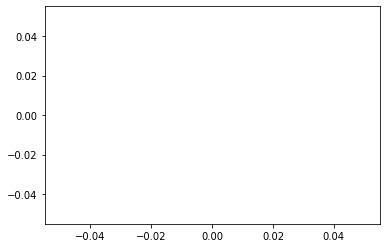

In [17]:
plt.plot(losses)

In [18]:
saved_cartpole_video = dlc.P3.save_video(cartpole_model, "CartPole-v0")
dlc.P3.video(saved_cartpole_video)

Successfully saved 200 frames into CartPole-v0.mp4!


#Part 2: Pong


<div dir='rtl'style="text-align: right;font-family:verdana;">

در مساله‌ی cartpole ما با یک محیط استاتیک سروکار داشتیم. به این معنا که با گذشت زمان تغییر در آن رخ نمی‌دهد. در این قسمت شما به بررسی محیط دینامیک 
[Pong](https://en.wikipedia.org/wiki/Pong)
در مقابل یک حریف دیگر می‌پردازید. ما نمی‌دانیم که حریف مقابل رفتار می‌کند. بنابراین پیچیدگی مساله‌ افزایش پیدا می‌کند. فانکشن‌هایی که برای  agent در قسمت قبل استفاده کرده‌اید نیز در این قسمت قابل کاربرد هستند.

## 3.6 Pong environment


In [19]:
!pip install -f https://github.com/Kojoley/atari-py/releases atari_py
!pip install git+https://github.com/Kojoley/atari-py.git

Looking in links: https://github.com/Kojoley/atari-py/releases
  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-jfom2w_o
  Running command git clone -q https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-jfom2w_o


In [20]:
def environment_pong(): 
  return gym.make("Pong-v0", frameskip=5)

In [21]:
environment = environment_pong()
print("observation space =", environment.observation_space)

observation space = Box(0, 255, (210, 160, 3), uint8)


In [22]:
environment.seed(1); 
n_act = environment.action_space.n
print("No. possible actions =", n_act)

No. possible actions = 6


## 3.7 Pong agent


<div dir='rtl'style="text-align: right;font-family:verdana;">

شما با استفاده از شبکه‌ی CNN می‌توانید agent خود را به خوبی طراحی کنید.

In [23]:
#Pong agent
def model_pong():
  model = tf.keras.models.Sequential([
                                      
    #TODO
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(6,activation=None),
  
  ])
  return model

pong_model = model_pong()

## 3.8 Pong-specific functions


<div dir='rtl'style="text-align: right;font-family:verdana;">

در این قسمت به طراحی دو تابع پاداش و مشاهده برای Pong می‌پردازید. پاداش ۱ در صورت برنده شدن و تنبیه ۱- در صورت باختن تعلق می‌گیرد.
مشاهدات ما در این حالت تصویر هستند و نیاز هست روی آن‌ها پیش پردازش مانند  بریدن و مقیاس کردن تصویر٫ رنگ تصویر پس زمینه‌ را یکی کردن٫ صورت گیرد.

In [24]:
# reward function

def reward_dis(rewards, gamma=0.99): 
  reward_discounted = np.zeros_like(rewards)
  R = 0
  for t in reversed(range(0, len(rewards))):
      if rewards[t] != 0:
        R = 0

        
      # update the total discounted reward
      #TODO
      #TODO
      R = rewards[t] + gamma*R
      reward_discounted[t] = R



      
  return normalize(reward_discounted)

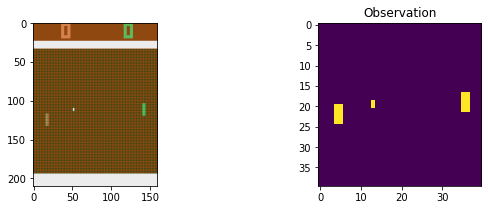

In [25]:
observ = environment.reset()
for i in range(30):
  actions = np.random.choice(n_act)
  observ, _,_,_ = environment.step(actions)
  observ_pp = dlc.P3.preprocess(observ)

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(observ); ax.grid(False);
ax2.imshow(np.squeeze(observ_pp)); ax2.grid(False); plt.title('Observation');

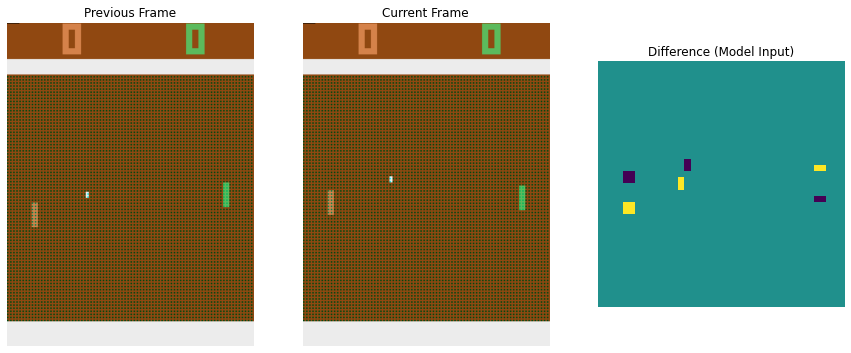

In [26]:
next_observ, _,_,_ = environment.step(np.random.choice(n_act))
diff = dlc.P3.change(observ, next_observ)

f, ax = plt.subplots(1, 3, figsize=(15,15))
for a in ax:
  a.grid(False)
  a.axis("off")
ax[0].imshow(observ); ax[0].set_title('Previous Frame');
ax[1].imshow(next_observ); ax[1].set_title('Current Frame');
ax[2].imshow(np.squeeze(diff)); ax[2].set_title('Difference (Model Input)');

### Roll function

<div dir='rtl'style="text-align: right;font-family:verdana;">

تابع roll_Function که در ادامه تعریف شده است به صورت سری مجموعه‌ای از مشاهدات را پردازش می‌کند.
برای درک بهتر کاری که این تابع انجام می‌دهد یک roll_Function بدون آموزش pong به صورت ویدیو در زیر نشان داده شده است و نشان می‌دهد مدل چه می‌بیند.

In [27]:
#Roll_function 


def roll_Func(batch_size, environment, model, act_function):

  memories = []

  for b in range(batch_size):

    memory = Memory()
    next_observ = environment.reset()
    pre_frame = next_observ
    done = False

    while not done:

      current_frame = next_observ
    
      frame_different = dlc.P3.change(pre_frame, current_frame) 

      action = act_function(pong_model,frame_different)
      next_observ, rewards, done, info = environment.step(action)

      #TODO: save the observed frame difference
      memory.add_memory(frame_different,action,rewards)

      pre_frame = current_frame
    
      memories.append(memory)
  
  return memories

In [28]:
# Model
model_test = model_pong()


single_batch = 1
memories = roll_Func(single_batch, environment, model_test, act_function)
save_roll_video = dlc.P3.save_video_memory(memories[0], "Random-Agent.mp4")

dlc.P3.video(save_roll_video)

## 3.9 Training Pong

<div dir='rtl'style="text-align: right;font-family:verdana;">

برای آموزش الگوریتم یادگیری تقویتی خود به صورت زیر عمل کنید:

۱-تعریف تابع هزینه و الگوریتم backpropagation

۲-الگوریتم یادگیری تقویتی agent

شما می‌توانید با موازی سازی الگوریتم یادگیری تقویتی خود سرعت اجرای الگوریتم را بهبود ببخشید.

درنهایت شما agent آموزش داده شده را با انجام بازی با AI تست می‌کنید. بازیکن سبز رنگ مربوط به agent شما می‌باشد.

In [29]:
learning_rate = 8e-4
MAX_ITERS = 1000
batch_size = 4

pong_model = model_pong()
last_itr = 0
if os.path.exists(f"{save_path}/pong/latest.txt"):
  with open(f"{save_path}/pong/latest.txt",'r') as f:
      pong_ckp = f.readline()[:-1]
      last_itr = int(f.readline())
      print(f"started from itr: {last_itr} from file {pong_ckp}.")
      pong_model.load_weights(pong_ckp)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)



iteration = last_itr 

reward_smooth = dlc.P4.LossHistory(smoothing_factor=0.9)
reward_smooth.append(0) 
plotter = dlc.P4.PeriodicPlotter(sec=15, xlabel='Iterations', ylabel='Win Percentage (%)')

environments = [environment_pong() for _ in range(batch_size)]

started from itr: 15 from file /content/drive/MyDrive/University/Deep Learning/HW6/Model_Checkpoint/pong/ckp_Sat Jan 22 05:21:18 2022_15.


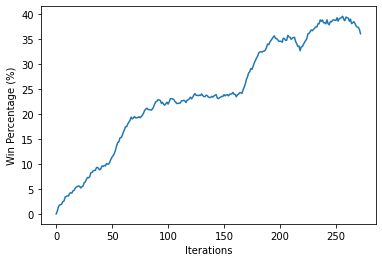

In [ ]:
# Training


games_episode = 21 # this is set by OpenAI gym and cannot be changed.

while iteration < MAX_ITERS:

  plotter.plot(reward_smooth.get())

  tic = time.time()

  memories = dlc.P3.parallelized_rollouts(batch_size, environments, pong_model, act_function)
  print(time.time()-tic)

  batch_memory = combined_memory(memories)

  wins_total = sum(np.array(batch_memory.rewards) == 1)
  games_total = sum(np.abs(np.array(batch_memory.rewards)))
  win_rate = wins_total / games_total
  reward_smooth.append(100 * win_rate)
  
  # Training
  train_model(pong_model,optimizer,np.stack(batch_memory.observs, 0),
              np.array(batch_memory.actions),reward_dis(batch_memory.rewards)) 

  if iteration % 5 == 0:
    dlc.P3.save_video(pong_model, "Pong-v0", 
                                                suffix="_"+str(iteration))
    
    pong_ckp = f"{save_path}/pong/ckp_{start_time}_{iteration}"

    pong_model.save_weights(pong_ckp)

    with open(f"{save_path}/pong/latest.txt",'w') as f:
      f.write(f"{pong_ckp}\n")
      f.write(str(iteration))
    
  iteration += 1 

In [ ]:
last_pong = dlc.P3.save_video(
    pong_model, "Pong-v0", suffix="_latest")
dlc.P3.video(last_pong, width=400)

<div dir='rtl'style="text-align: right;font-family:verdana;">

اگر agent شما تعداد دفعات کمتری آموزش ببیند٫ آیا در عملکرد آن تاثیری می‌گذارد؟

محدودیت‌هایی که در current frame و previous frame دارید در عملکرد agent چه تاثیری می‌گذارد؟

